In [7]:
import json

DATA_PART = "../../pubtabnet/anns/train"

with open(DATA_PART + "-HTML_lens.json", encoding="utf-8") as f:
        val_lens = json.load(f)

In [8]:
broken = ["PMC3856466_003_00"]

In [9]:
aux = []
for val in val_lens:
    if val['file'][:-5] in broken:
        continue
    aux.append(val)
val_lens = aux

# Análise Da Distribuição dos Dados

In [10]:
lens = [item['len'] for item in val_lens]
lens = sorted(lens)

In [21]:
normal_limit = 1536
outlier_limit = 800

In [22]:
summ_lens = 0

for lenght in lens:
    summ_lens += max(0, (1-normal_limit/lenght))

print(1-summ_lens/len(lens))

0.9961677176255062


In [23]:
import numpy as np

muX = np.average(lens)
sigX  = np.std(lens)

mu = np.log(muX**2/np.sqrt(muX**2+sigX**2))
sigma = np.sqrt(np.log(1+muX**2/sigX**2))

print(mu)
print(sigma)
print(np.mean(lens))
print(np.median(lens))
print(np.std(lens))
print(max(lens))
print(min(lens))

n_allowed = 0
while(lens[n_allowed] < normal_limit):
    n_allowed += 1

print(n_allowed/len(lens))

5.991172883368825
1.006558224020988
501.05741278053904
392.0
378.30046818253
6683
34
0.977147512765163


(array([[7.84366896e-04, 1.83301253e-03, 1.59327679e-03, 1.21179712e-03,
         9.18092010e-04, 6.83383803e-04, 5.08717649e-04, 3.79515512e-04,
         2.84785297e-04, 2.15769372e-04, 1.60178215e-04, 1.22102327e-04,
         8.54139654e-05, 3.72830157e-05, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000

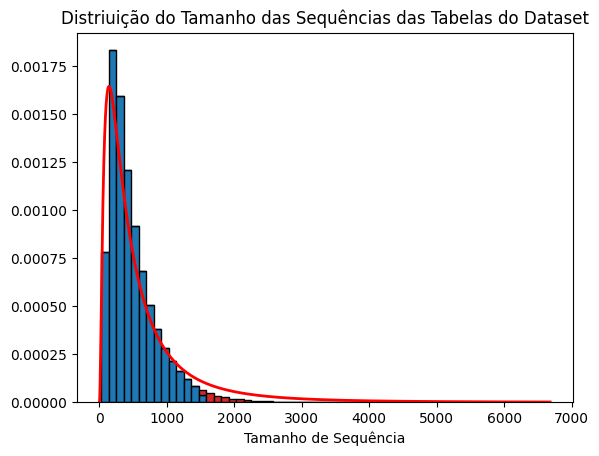

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import lognorm

x = np.array([1*i for i in range(1, max(lens))])

allowed_lens = lens[:n_allowed]
nallowed_lens = lens[n_allowed:]

pdf = pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/(x * sigma * np.sqrt(2 * np.pi)))


plt.title("Distriuição do Tamanho das Sequências das Tabelas do Dataset")

plt.xlabel("Tamanho de Sequência")

plt.plot(x, pdf, linewidth=2, color='r')

plt.hist([allowed_lens, nallowed_lens], bins = 60, color = ['tab:blue', 'tab:red'], edgecolor='black', density = True, stacked = True)

In [11]:
normal_tables = []
outlier_tables = []
for item in val_lens:
    if(item['file'] in broken):
        continue
    if item['len'] < 6000:
        normal_tables.append(item)
    if item['len'] > outlier_limit and item['len'] < 4500:
        outlier_tables.append(item)

In [12]:
len(normal_tables)

9115

In [13]:
len(outlier_tables)

1608

In [14]:
normal_tables[0]

{'file': 'PMC3614539_005_01.json', 'len': 413}

In [15]:
with open(DATA_PART + '_outlier_trunc_filelist.json', 'w') as out:
    for item in outlier_tables:
        out.write(item['file']+"\n")

In [16]:
with open(DATA_PART + '_trunc_filelist.json', 'w') as out:
    for item in normal_tables:
        out.write(item['file']+"\n")

In [17]:
len(val_lens)

9115

# Análise Do Uso de Memória

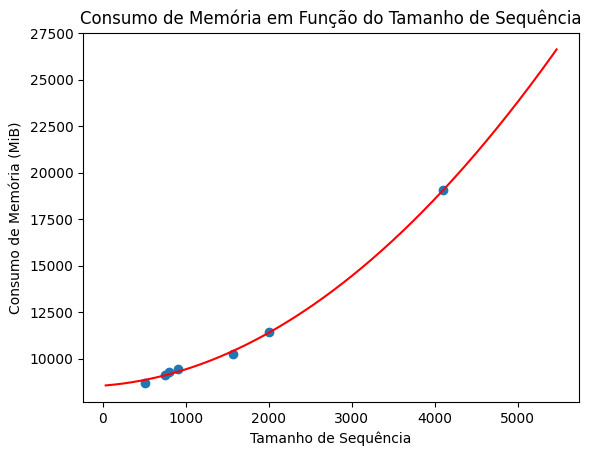

In [18]:
mem_cons = [(512,   8686),
            (750,   9128),
            (800,   9266),
            (900,   9438),
            (1563, 10246),
            (2000, 11416),
            (4096, 19044)
           ]

import numpy as np

seq_size = [item[0] for item in mem_cons]
mem = [item[1] for item in mem_cons]

model = np.poly1d(np.polyfit(seq_size, mem, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(min(lens), max(lens)*1.1, 1000)
plt.scatter(seq_size, mem)
plt.plot(polyline, model(polyline), color = 'red')


plt.title("Consumo de Memória em Função do Tamanho de Sequência")

plt.ylabel("Consumo de Memória (MiB)")
plt.xlabel("Tamanho de Sequência")

plt.show()

In [19]:
np.polynomial.polynomial.Polynomial.fit(seq_size, mem, 2, full= True)

(Polynomial([12202.16315476,  5090.77246292,  1745.49959028], domain=[ 512., 4096.], window=[-1.,  1.], symbol='x'),
 [array([87930.02275298]),
  3,
  array([1.51033714, 0.77024584, 0.35440523]),
  1.5543122344752192e-15])

In [20]:
print(model(3000))
print(model(1536))
print(model(max(lens)))

14442.689704426703
10341.005493350849
23633.4347859048


In [23]:
for item in val_lens:
    if( item['len'] > 3096):
        print(item['file'], item['len'])

PMC5946264_003_00.json 4969
PMC5657951_002_00.json 3304
PMC3342910_009_00.json 3110
PMC5893687_006_00.json 3482
PMC5309725_003_00.json 3740
PMC5986448_004_00.json 3627
PMC5708042_005_00.json 3112
PMC5451915_008_00.json 3192
PMC3196921_007_00.json 3121
PMC4984455_007_00.json 3808
PMC4732988_002_00.json 3930
PMC3819704_006_00.json 3220
